In [1]:
###########################################################
# Data From https://www.kaggle.com/unsdsn/world-happiness #
###########################################################
# Created visualizations and conducted analysis on world  #
# happiness data.                                         #
###########################################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# all years within the excel datasheet
years=['2015','2016','2017','2018','2019']

In [4]:
# create an empty dataframe to store the happiness data
happy=pd.DataFrame()

# loop through to find the years and concatanate
for year in years:
    print(year)
    data=pd.read_excel('WorldHappiness.xls',year)
    data['year']=year
    print(data.shape)
    happy=pd.concat([happy,data])

2015
(158, 10)
2016
(157, 10)
2017
(155, 10)
2018
(156, 10)
2019
(156, 10)


In [5]:
happy.shape

(782, 10)

In [6]:
happy.tail()

,Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Generosity,Corruption,year
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [7]:
# create new dataframe with selected columns
happyscore=pd.DataFrame()
happyscore['year']=happy['year']
happyscore['country']=happy['Country']
happyscore['score']=happy['Happiness Score']
happyscore['GDP']=happy['GDP per capita']

In [8]:
happyscore.head()

,year,country,score,GDP
0,2015,Switzerland,7.587,1.39651
1,2015,Iceland,7.561,1.30232
2,2015,Denmark,7.527,1.32548
3,2015,Norway,7.522,1.45900
4,2015,Canada,7.427,1.32629


Text(0.5, 1.0, 'Generosity vs Freedom')

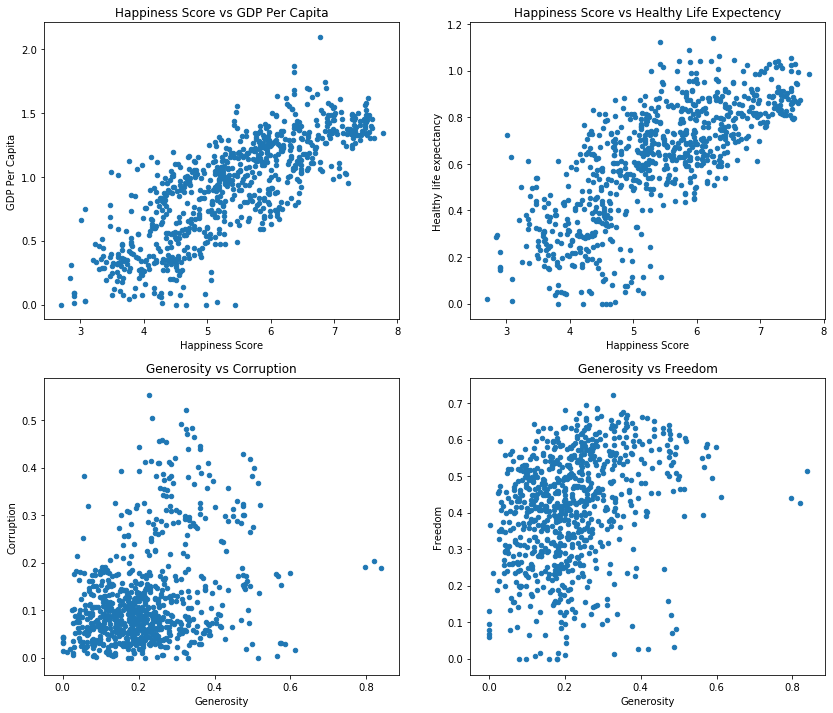

In [9]:
# Set plot sizes and location
plt.figure(figsize=(14,12))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)

# generate scatter plot comparing happiness score and gdp per capita
gdpaxes=happyscore.plot.scatter('score','GDP', ax=ax1)
gdpaxes.set_title('Happiness Score vs GDP Per Capita')
gdpaxes.set_xlabel('Happiness Score')
gdpaxes.set_ylabel('GDP Per Capita')

# generate scatter plot comparing happiness score and life expectency
lifeaxes=happy.plot.scatter('Happiness Score','Healthy life expectancy', ax=ax2)
lifeaxes.set_title('Happiness Score vs Healthy Life Expectency')

# generate scatter plot comparing corruption to genoristy (Higher corruption value= lower corruption)
corgen=happy.plot.scatter('Generosity', 'Corruption', ax=ax3)
corgen.set_title('Generosity vs Corruption')

# generate scatter plot comparing freedom to generosity
freegen=happy.plot.scatter('Generosity', 'Freedom', ax=ax4)
freegen.set_title('Generosity vs Freedom')

In [10]:
# Locate a specific country
happy.loc[happy.Country=='United States', :]

,Rank,Country,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Generosity,Corruption,year
14,15,United States,7.119,1.394510,1.247110,0.861790,0.546040,0.401050,0.158900,2015
12,13,United States,7.104,1.507960,1.047820,0.779000,0.481630,0.410770,0.148680,2016
13,14,United States,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2017
17,18,United States,6.886,1.398000,1.471000,0.819000,0.547000,0.291000,0.133000,2018
18,19,United States,6.892,1.433000,1.457000,0.874000,0.454000,0.280000,0.128000,2019


Text(0, 0.5, 'Happiness Score')

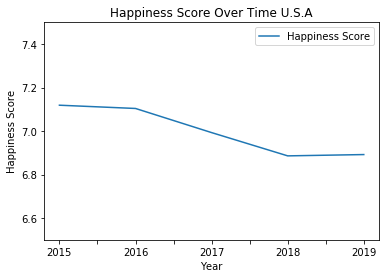

In [11]:
# create Happines over Time in the United States Graph
happyus=happy.loc[happy.Country=='United States', :]
usgraph=happyus.plot.line('year', 'Happiness Score', ylim=(6.5, 7.5))
usgraph.set_title("Happiness Score Over Time U.S.A")
usgraph.set_xlabel('Year')
usgraph.set_ylabel('Happiness Score')

In [12]:
# Create new data frame for average global happiness
happyavgg=pd.DataFrame()
happyavgg['year']=happy['year']
happyavgg['HappyScore']=happy['Happiness Score']
happyavgg.head()

,year,HappyScore
0,2015,7.587
1,2015,7.561
2,2015,7.527
3,2015,7.522
4,2015,7.427


In [13]:
# group by year to display average global happiness by year
happyavg=happyavgg.groupby('year').mean()
happyavg.head()

,HappyScore
year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


Text(0, 0.5, 'Happiness Score')

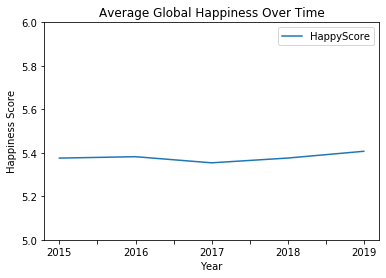

In [14]:
# create a line graph to track global happiness over time
happyavggraph=happyavg.plot.line(ylim=(5, 6))
happyavggraph.set_title("Average Global Happiness Over Time")
happyavggraph.set_xlabel("Year")
happyavggraph.set_ylabel("Happiness Score")

In [15]:
# create a dataframe with USA happiness averages for each year
happyusa=pd.DataFrame()
happyusa['Year']=happyus['year']
happyusa['USA Happiness']=happyus['Happiness Score']
happyusa.head()

,Year,USA Happiness
14,2015,7.119
12,2016,7.104
13,2017,6.993
17,2018,6.886
18,2019,6.892


In [16]:
# dataframe from average global happiness for each year
happyavgcompare=pd.DataFrame(happyavg)
happyavgcompare.head()

,HappyScore
year,
2015,5.375734
2016,5.382185
2017,5.354019
2018,5.375917
2019,5.407096


In [17]:
# combine happiness values from USA and global average for each year
happyyear=happyusa.groupby('Year').mean()
avguscompare=pd.DataFrame(happyyear)
avguscompare['Global Happiness']=happyavgcompare['HappyScore']
avguscompare.head()

,USA Happiness,Global Happiness
Year,,
2015,7.119,5.375734
2016,7.104,5.382185
2017,6.993,5.354019
2018,6.886,5.375917
2019,6.892,5.407096


Text(0, 0.5, 'Happiness Score')

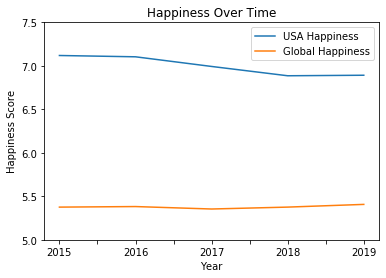

In [18]:
# Set graph parameters and labels
globalus=avguscompare.plot.line(ylim=(5, 7.5))
globalus.set_title('Happiness Over Time')
globalus.set_ylabel('Happiness Score')

In [19]:
# locate only Finland values, include year and happiness score
# Burundi has the lowest average happiness score over the past 5 years
happybur=happy.loc[happy.Country=='Burundi', :]
happyburundi=pd.DataFrame()
happyburundi['Year']=happybur['year']
happyburundi['Burundi Happiness']=happybur['Happiness Score']
happyburundi.head()

,Year,Burundi Happiness
156,2015,2.905
156,2016,2.905
153,2017,2.905
155,2018,2.905
144,2019,3.775


In [20]:
# locate only south sudan values, include year and happiness
# Denmark has the highest average happiness score over the last 5 years
happyden=happy.loc[happy.Country=='Denmark', :]
happydenmark=pd.DataFrame()
happydenmark['Year']=happyden['year']
happydenmark['Denmark Happiness']=happyden['Happiness Score']
happydenmark.head()

,Year,Denmark Happiness
2,2015,7.527
0,2016,7.526
1,2017,7.522
2,2018,7.555
1,2019,7.600


In [21]:
# Group each country by year and combine average yearly values into one table
happyglobalc=happydenmark.groupby('Year').mean()
happyusacompare=happyus.groupby('year').mean()
happyburundicompare=happyburundi.groupby('Year').mean()
avgglobalcompare=pd.DataFrame(happyglobalc)
avgglobalcompare['USA Happiness']=happyusacompare['Happiness Score']
avgglobalcompare['Global Happiness']=happyavgcompare['HappyScore']
avgglobalcompare['Burundi Happiness']=happyburundicompare['Burundi Happiness']
avgglobalcompare.head()                                           

,Denmark Happiness,USA Happiness,Global Happiness,Burundi Happiness
Year,,,,
2015,7.527,7.119,5.375734,2.905
2016,7.526,7.104,5.382185,2.905
2017,7.522,6.993,5.354019,2.905
2018,7.555,6.886,5.375917,2.905
2019,7.600,6.892,5.407096,3.775


Text(0, 0.5, 'Happiness Score')

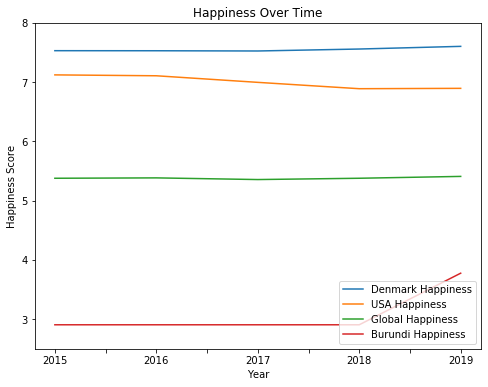

In [22]:
# set parameters and labels
plt.figure(figsize=(8,6))
ax1=plt.subplot(1,1,1)
worldwidegraph=avgglobalcompare.plot.line(ylim=(2.5,8), ax=ax1)
worldwidegraph.set_title('Happiness Over Time')
worldwidegraph.set_ylabel('Happiness Score')

In [23]:
# Group all countries for average values within all columns
ga=happy.groupby('Country').mean()
ga.sort_values('Happiness Score')

,Rank,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Generosity,Corruption
Country,,,,,,,,
Burundi,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.185921,0.106992
Central African Republic,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.243057,0.053114
Syria,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.431285,0.159547
South Sudan,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.242665,0.110986
Rwanda,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.226311,0.473468
...,...,...,...,...,...,...,...,...
Iceland,3.20,7.51100,1.386523,1.492813,0.917744,0.618035,0.419124,0.140145
Switzerland,3.60,7.51140,1.472164,1.417332,0.928318,0.620642,0.277432,0.379763
Finland,3.60,7.53780,1.356960,1.434429,0.873836,0.621536,0.217783,0.398474


Text(0.5, 1.0, 'GDP vs Social Support (size of bubble is generosity)')

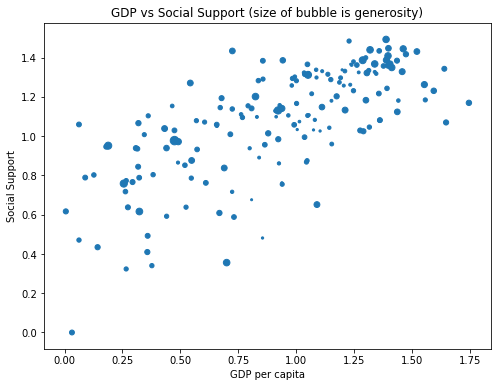

In [24]:
# create bubble chart showing GDP, Social Support, and Generosity
plt.figure(figsize=(8,6))
ax1=plt.subplot(1,1,1)
globalbubble=ga.plot.scatter('GDP per capita','Social Support', s=ga['Generosity']*100, ax=ax1)
globalbubble.set_title('GDP vs Social Support (size of bubble is generosity)')

Text(0, 0.5, 'Happiness Score')

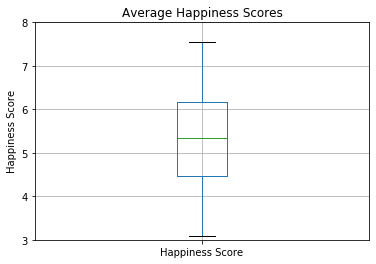

In [25]:
# create box and whisker plot to show average happiness scores within quartiles
gabox=ga.boxplot('Happiness Score')
gabox.set_title('Average Happiness Scores')
gabox.set_ylim(3,8)
gabox.set_ylabel('Happiness Score')

,Rank,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Generosity,Corruption
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,78.665000,5.380388,0.912901,1.074248,0.608636,0.412549,0.221652,0.129571
std,44.188006,1.099061,0.411169,0.278893,0.242023,0.143161,0.115535,0.104323
min,2.200000,3.079000,0.005661,0.000000,0.037830,0.027433,0.000000,0.001654
25%,40.850000,4.466050,0.579838,0.938526,0.424205,0.322620,0.137867,0.059796
50%,79.600000,5.334300,0.986673,1.106597,0.665635,0.432305,0.208368,0.097550
75%,120.300000,6.163150,1.243963,1.309893,0.781592,0.510057,0.279125,0.159161
max,153.800000,7.546000,1.743691,1.492813,1.029513,0.655988,0.723533,0.473468
